# EEP/IAS 118 - Introductory Applied Econometrics

## Problem Set 4, Spring 2023, Villas-Boas

#### <span style="text-decoration: underline">Due in Gradescope – see deadline due time  in Gradescope – April 4, 2023</span> 

Submit materials as **one pdf** on [Gradescope](https://www.gradescope.com/courses/492989). After uploading the pdf to Gradescope, please **assign all and only the appropriate pages to each question**. Questions that do not have properly assigned pages on Gradescope may not be graded. Codes and outputs not properly displayed will be marked as incorrect.

**For full credit**, all confidence intervals/hypothesis tests must be conducted by hand - you can use functions like sd() or mean() to get values to plug into the formulas, but no credit will be given for the use of canned interval/test functions (i.e. linearHypothesis()) with no steps/calculations provided. Do not round any intermediate steps or final answers to less than four decimal digits.

### Preamble
When writing R code, it's a good habit to start your notebooks or R scripts with a preamble, a section where you load all necessary packages, set paths or change the working directory, or declare other options.

Use the below code cell to load in packages you will use throughout the problem set (at least `haven`, `tidyverse` and `ggplot` this week). 

*Note:* **never** try to install packages on Datahub. All packages that you need are already installed and can be loaded immediately using the `library()` function. Attempting to install packages will create conflicts with the package versions on the server and potentially corrupt your notebook.

In [1]:
# insert your code here
library(haven)
library(tidyverse)
library(ggplot2)
library(lm.beta)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Exercise 1. 

In this problem set, we use a dataset on the annual salary of executives and the characteristics of the firm, and the firm's outcomes. This exercise is to be completed using R. If the labor market does not value a characteristic of the employer such as an outcome in the firm that the executive is responsible for (i.e. the value of sales or change in the rate of return) or the years of tenure as an executive (proxying experience), the demand for those executives and their salary goes downs and vice versa.

*Note: log refers to the natural log, ln().*

| VARIABLE | Definition	|
|:-:|:-:|
| SALARY	| annual CEO salary (including bonuses) in 1990 (in thousands USD)  |
| SALES | firm sales in 1990 (in millions USD) |
| ROE | average return on equity, 1988–1990 (in percent)  |
| FINANCE | = 1 if a financial company, 0 otherwise | 


#### Q1-1. ####
Read the data and create the log of salary as an additional column in the data. Call this variable lsalary. Note: The dataset is in Stata. It is available on bCourses and is called pset4_2023.DTA.

In [2]:
# insert your code here
pset4 <- read_dta("pset4_2023.DTA")
pset4n <- mutate(pset4, lsalary = log(salary))
head(pset4n)

salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998510,10.225389
1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894
1145,5,6021.4,20.0,1.0,55,1,0,0,0,7.043160,8.703075


#### Q1-2 ####
For *only* the following variables, report the sample mean, standard deviation, minimum, and maximum: salary, log salary, average return on equity, sales, and whether the company is a financial one (Hint: summarise()) 

Coding outputs from summarise() is sufficient, as long as what variable and summary stats each number pertains to is clear - no need to worry about unit / unit conversion.

In [3]:
# insert your code here
t(summarise(pset4n, 
          across(.cols = c(salary, lsalary, roe, sales, finance),
                 .fns = list(avg = mean, SD = sd, min=min,max=max))
          ))

salary_avg,1.281120e+03
salary_SD,1.372345e+03
salary_min,2.230000e+02
salary_max,1.482200e+04
lsalary_avg,6.950386e+00
lsalary_SD,5.663741e-01
lsalary_min,5.407172e+00
lsalary_max,9.603868e+00
roe_avg,1.718421e+01
roe_SD,8.518509e+00
roe_min,5.000000e-01


#### Q1-3 ####
(a) Create a histogram for the CEO salary. Label everything: add axis titles and a main title. (Hint: see the Histograms section of Coding Bootcamp Part 4) 

(b) Then, plot another histogram for CEO salary in the financial sector. 

(c) Finally, plot the same graph for CEO salary not in the finance sector. 

(d) What is the average CEO salary for each group? (Remember, units and unit conversion.)

(e) Overlap both histograms into the same figure.

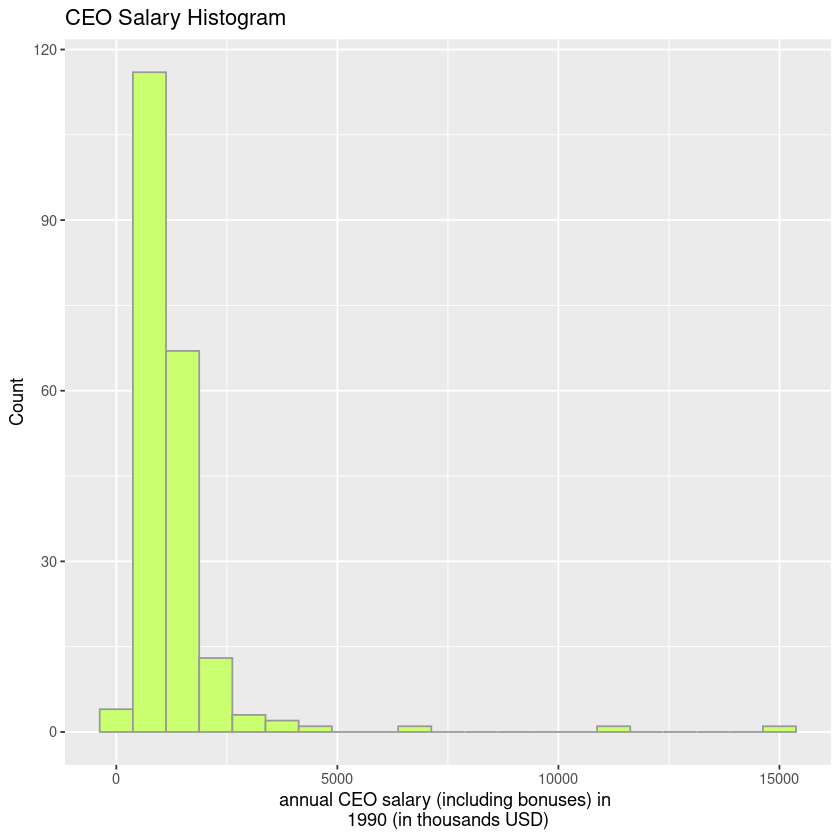

In [4]:
# insert your code here (a)
ggplot(data = pset4n, aes(x = salary)) +
    geom_histogram(binwidth = 750, colour = "grey60", 
                   fill = "darkolivegreen1") +
    labs(title = "CEO Salary Histogram",
        x = "annual CEO salary (including bonuses) in 
1990 (in thousands USD)",
        y = "Count")


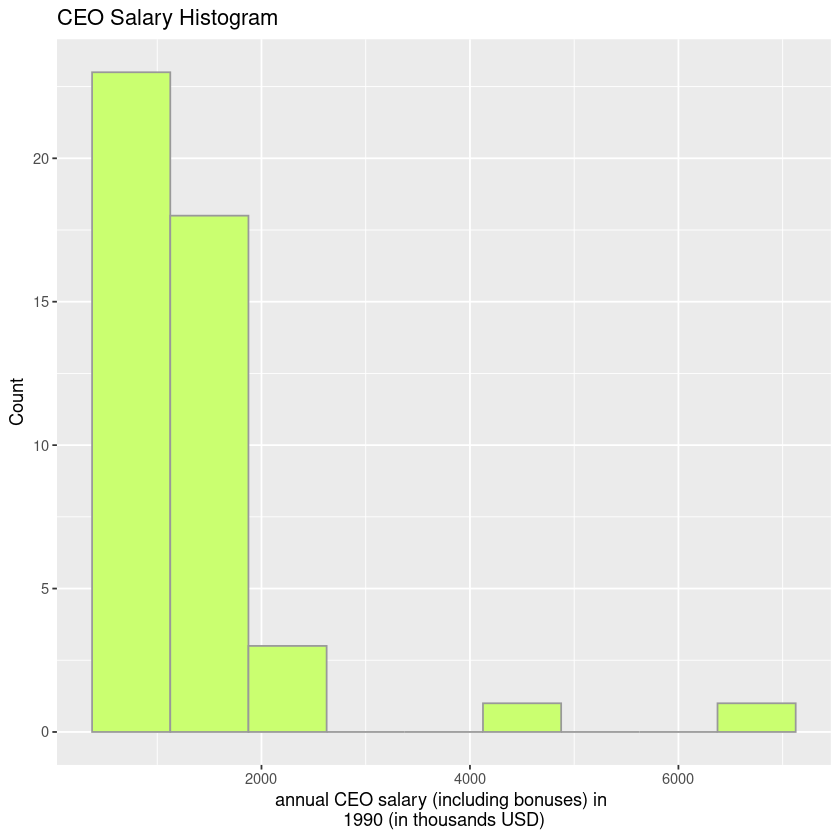

In [5]:
# insert your code here (b)

pset4n %>%
    filter(finance == 1) %>%
    ggplot(aes(x = salary)) +
    geom_histogram(binwidth = 750, colour = "grey60", 
                   fill = "darkolivegreen1") +
    labs(title = "CEO Salary Histogram",
        x = "annual CEO salary (including bonuses) in 
1990 (in thousands USD)",
        y = "Count")

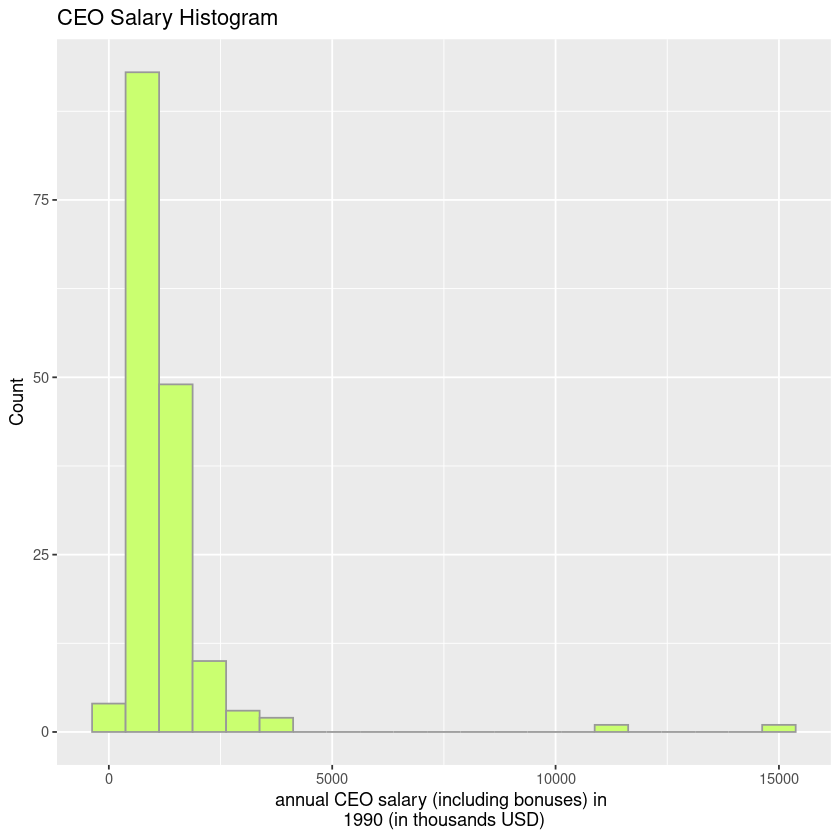

In [6]:
# insert your code here (c)
pset4n %>%
    filter(finance == 0) %>%
    ggplot(aes(x = salary)) +
    geom_histogram(binwidth = 750, colour = "grey60", 
                   fill = "darkolivegreen1") +
    labs(title = "CEO Salary Histogram",
        x = "annual CEO salary (including bonuses) in 
1990 (in thousands USD)",
        y = "Count")

In [7]:
# insert your code here (d)
mean(filter(pset4n, finance==1)$salary)*1000
mean(filter(pset4n, finance==0)$salary)*1000

[1] 1344913

[1] 1263117

➡️ Type your written answer for _Exercise 1 Question 3d_ here (replacing this text).

The annual CEO salary for CEO's in the finance sector in 1990 is 1344913.04347826 dollars and the annual CEO salary for CEO's not in the finance section in 1990 is 1263116.56441718 dollars

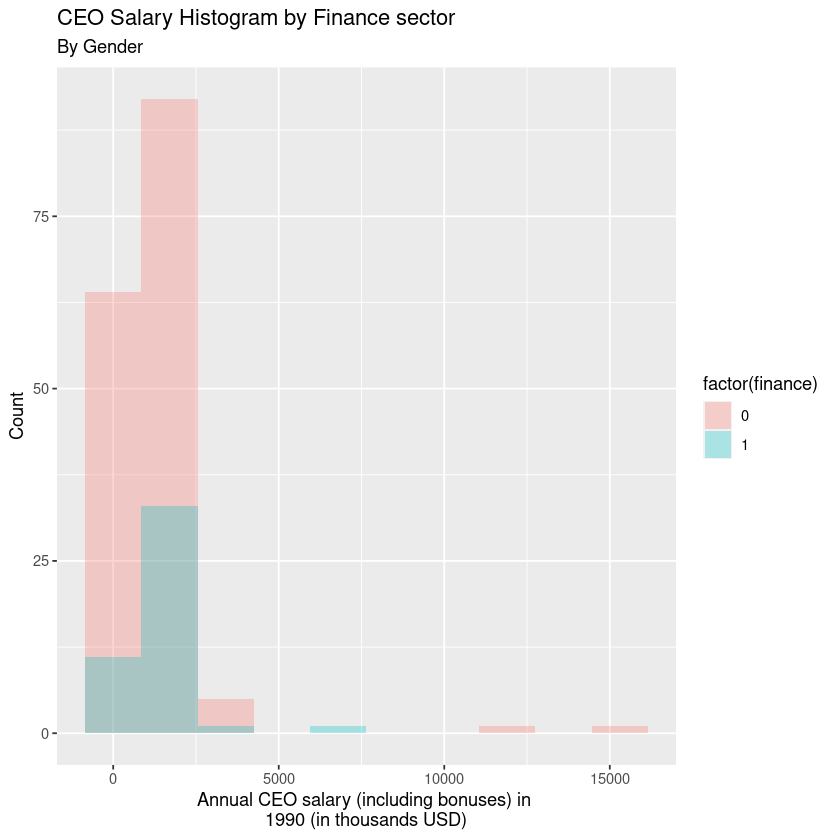

In [8]:
# insert your code here (e)
ggplot(data = pset4n, aes(x = salary)) +
    geom_histogram(aes(fill = factor(finance)), 
                   position = "identity", 
                   alpha = 0.3, binwidth = 1700) +
    labs(title = "CEO Salary Histogram by Finance sector",
         subtitle = "By Gender",
         x = "Annual CEO salary (including bonuses) in 
1990 (in thousands USD)",
         y = "Count")

#### Q1-4 ####
Estimate the model of salary as a linear function of a constant, firm’s sales, and average ROE. Comment on the estimated intercept and each of the right-hand side variables’ estimated parameters in terms of Sign, Size, and Significance (SSS).

In [9]:
# insert your code here
lmsalary = lm(salary~sales+roe, data = pset4n)
#Create the linear regression
summary(lmsalary) #Review the results


Call:
lm(formula = salary ~ sales + roe, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1501.8  -492.6  -232.0   123.3 13575.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.306e+02  2.239e+02   3.710 0.000267 ***
sales       1.634e-02  8.874e-03   1.842 0.066973 .  
roe         1.963e+01  1.108e+01   1.772 0.077823 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1359 on 206 degrees of freedom
Multiple R-squared:  0.02917,	Adjusted R-squared:  0.01975 
F-statistic: 3.095 on 2 and 206 DF,  p-value: 0.04739


➡️ Type your written answer for _Exercise 1 Question 4 Intercept_ here (replacing this text).

The coefficient for the intercept is 830.6 (in thousands) which equals 830.6*1000 = 830600 dollars. This means that when sales is 0 and roe is 0 then the predicted estimated CEO salary is 830600 dollars. The **sign** is positive which means that even though there are 0 usd in sales and 0 usd average return on equity, estimated CEO salary is still a positive number so even with no change in sales or reo estimated salary is still at 830600 dollars. The **size** referes to the interpretation that at 0 usd in sales and 0 usd reo estimated salary is still a fairly high amount at 830600 dollars. For **significance** given that the pvalue of the intercept is 0.000267 so the coefficient is statistically significant at the .1% level (which implies that it is also significant at the 1%, 5%, and 10% levels).  

➡️ Type your written answer for _Exercise 1 Question 4 Coefficient 1_ here (replacing this text).

The coefficient for sales is .01634. This means that holding roe constant, a one unit (usd) increase in sales leads to a $.01634 (in thousands) = $16.34 in predicted salary. The **sign** on the coefficient is positive which means an increase in sales is associated with an increase in predicted salary. The **size** refers to the interpretation that one additional increase in usd for sale increases predicted salary by 16.34 dollars. For **significance** given that the pvalue of sales is 0.066973 so the coefficient is statistically significant at the 10% level. 

➡️ Type your written answer for _Exercise 1 Question 4 Coefficient 2_ here (replacing this text).

The coefficient for roe is 19.63. This means that holding sales constant, a one percent increase in average return on equity leads to a 19.63(in thousands usd) = $19,630 in predicted salary. The **sign** on the coefficient is positive which means an increase in roe is associated with an increase in predicted salary. The **size** refers to the interpretation that one percent increase in ROE increases predicted salary by 19,630 dollars. For **significance** given that the pvalue of roe is 0.077823 so the coefficient is statistically significant at the 10% level. 

#### Q1-5 ####
In absolute terms, does average ROE or sales have a larger impact on expected salary? (Use Standardized Regression - Lec 13/Sec6) 

In [10]:
# insert your code here
Reg1_Standardized <- lm.beta(lmsalary)
summary(Reg1_Standardized)


Call:
lm(formula = salary ~ sales + roe, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1501.8  -492.6  -232.0   123.3 13575.2 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 8.306e+02    0.000e+00  2.239e+02   3.710 0.000267 ***
sales       1.634e-02    1.266e-01  8.874e-03   1.842 0.066973 .  
roe         1.963e+01    1.219e-01  1.108e+01   1.772 0.077823 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1359 on 206 degrees of freedom
Multiple R-squared:  0.02917,	Adjusted R-squared:  0.01975 
F-statistic: 3.095 on 2 and 206 DF,  p-value: 0.04739


➡️ Type your written answer for _Exercise 1 Question 5_ here (replacing this text).

The standardized coefficient for sales is .1266. This means that a 1 SD increase in sales increases expected/estimated salary by .1266 SD (in thousands of dollars). The standardized coefficient for roe is .1219. This means that a 1 SD increase in roe increases expected/estimated salary by .1219 SD (in thousands of dollars). So in absolute terms, sales has a larger impact on expected salary than roe.

#### Q1-6 ####
(a) Estimate the model of salary as a linear function of a constant, firm’s sales, average ROE, and an indicator for being in the financial sector. 

(b) Test the joint significance of the ROE and sales variables at the 1% significance level.

In [11]:
# insert your code here for q1-6a
regq6 = lm(salary~sales+roe+finance, 
           data = pset4n) #Create the linear regression
summary(regq6)


Call:
lm(formula = salary ~ sales + roe + finance, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1499.8  -466.0  -244.8   106.4 13614.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 7.593e+02  2.416e+02   3.143  0.00192 **
sales       1.680e-02  8.901e-03   1.887  0.06051 . 
roe         2.125e+01  1.128e+01   1.885  0.06083 . 
finance     1.829e+02  2.313e+02   0.791  0.42994   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1360 on 205 degrees of freedom
Multiple R-squared:  0.03212,	Adjusted R-squared:  0.01796 
F-statistic: 2.268 on 3 and 205 DF,  p-value: 0.08174


➡️ Type your written answer for _Exercise 1 Question 6b_ here (replacing this text).

**Step 1** Null and alternative hypotheses:

H0: beta_sales = beta_roe = 0 (also can be stated as Beta_percentleanrep2022 = 0 & Beta_pccars = 0) 

H1: beta_sales != 0 or beta_roe != 0 or both

**Step 2** compute f statistic

I calculated the f statistic for this joint hypothesis as follows:

F = ((R2_ur - R2_r)/q)/((1-R2_ur)/(n-K_ur-1))

where R2_ur is the r squared value for the unrestricted model with all variables and R2_r is the r squared value for the restricted model and q is the number of restrictions and n is the total number of samples and K_ur is the number of variables in the model to get:

F = ((0.03212-0.0006127 )/2)/((1-0.03212)/209-3-1) = 3.33667215977187

**Step 3** significance level and critical value

Significance level is 0.01 and the numerator degrees of freedom = q = 2 and denominator degrees of freedom = 205 so to find a more accurate value I utilized the qf() function and got a more accurate value of 4.71018872511437

**Step 4** reject?

Since 3.33667215977187 is not greater than 4.71018872511437, we fail to reject the null that beta_sales and beta_roe are jointly equal to zero in favor of the alternative that at least one is nonzero at the 1% significance level

**Step 5** interpretation

There is no statistical evidence at the 1% level that, conditional on whether or not it is a finance company, roe and sales affect expected/estimated salary. In other words, sales are roe are jointly insignificant. 

In [12]:
# code utilited to answer question 1-6b
R2_ur = 0.03212
R2_r = 0.0006127
q = 2
n = 209
K_ur = 3
((R2_ur - R2_r)/q)/((1-R2_ur)/(n-K_ur-1))
n-K_ur-1
qf(p=.01, df1=q, df2=n-K_ur-1, lower.tail=FALSE)

regq6 = lm(salary~finance, data = pset4n) #Create the linear regression
summary(regq6)

[1] 3.336672

[1] 205

[1] 4.710189


Call:
lm(formula = salary ~ finance, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1040.1  -534.1  -247.9   137.9 13558.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1263.1      107.7  11.726   <2e-16 ***
finance         81.8      229.6   0.356    0.722    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1375 on 207 degrees of freedom
Multiple R-squared:  0.0006127,	Adjusted R-squared:  -0.004215 
F-statistic: 0.1269 on 1 and 207 DF,  p-value: 0.722


#### Q1-7 ####
Looking at the coefficients on the ROE across two models in Q4 and Q6, what do you conclude in terms of the type of firm being in the finance sector having caused bias on the impact of ROE on salary if not considered?

➡️ Type your written answer for _Exercise 1 Question 7_ here (replacing this text).

w/o finance: 19.63

w/ finance: 21.25

including finance increased coefficient

The coefficient estimate for roe without finance is 19.63 whereas with finance it was 21.25 which means there is a bias present and it moves towards the negative direction when we omit the finance variable. We have a downward OVM. I conclude that the type of firm being in the finance sector has a different effect on reo compared to nonfinance firms. 

#### Q1-8 ####
(a) Using only data on nonfinance sector observations, specify a model to predict the average salary of an executive whose firm has an ROE of 10% with 4,000 (meaning 4 billion USD) in sales.

(b) Construct a 95% confidence interval for the predicted average salary for an executive with those characteristics.

In [13]:
# insert your code here
nonfinancepset <- filter(pset4n, finance==0)
nonfinancepset$roe<-nonfinancepset$roe-10
nonfinancepset$sales<-nonfinancepset$sales-4000
reg8 <- lm(salary~roe+sales, nonfinancepset)
summary(reg8)
print("------------------------------------------------------")
print("95% confidence interval")
cval <- qt(.975, 160, lower.tail=TRUE)
c(999.6-(cval*155.7), 999.6+(cval*155.7))*1000


Call:
lm(formula = salary ~ roe + sales, data = nonfinancepset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1369.1  -457.2  -256.1    87.1 13600.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.996e+02  1.557e+02   6.422 1.46e-09 ***
roe         2.670e+01  1.263e+01   2.115    0.036 *  
sales       1.553e-02  9.678e-03   1.605    0.111    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1441 on 160 degrees of freedom
Multiple R-squared:  0.04023,	Adjusted R-squared:  0.02823 
F-statistic: 3.353 on 2 and 160 DF,  p-value: 0.03745


[1] "------------------------------------------------------"
[1] "95% confidence interval"


[1]  692107.8 1307092.2

➡️ Type your written answer for _Exercise 1 Question 8_ here (replacing this text).

The average salary of an executive whose firm has an ROE of 10% with 4 billion USD in sales can be estimated as the intercept of the above regression. So the average salary is estimated to be 999.6 usd in thousands = 999,600 dollars. 

We predict the average salary  to be between 692,107.827107876 and 1,307,092.17289212 

#### Q1-9 ####
What would be the 95% confidence interval for the predicted salary (not the average predicted) with those characteristics in 8.a. above? Are you surprised that the intervals differ between questions 8.b. and 9? (Hint: Lec 14)

In [14]:
# insert your code here
avgsal <- (999.6 + (26.7*10)+(.01553*4000))*1000
avgsal
cval <- qt(0.975, nrow(nonfinancepset)-1)
sd8 <- sd(nonfinancepset$salary)
c(avgsal - cval *(sd8/sqrt(nrow(nonfinancepset))), 
  avgsal + cval * (sd8/sqrt(nrow(nonfinancepset))))

[1] 1328720

[1] 1328494 1328946

➡️ Type your written answer for _Exercise 1 Question 9_ here (replacing this text).

The confidence interval states that with 95% probability this confidence interval has the true predicted salary for a ceo of a firm with roe = 10% and sales of 4 billion usd. So specifically in this case we are 95% confident that our interval covers the true salary for a ceo of a firm with roe = 10% and sales of 4 billion usd between the values 1,328,493.87866557 dollars and upper end of 1,328,946.12133443 dollars. I am not surprised that the intervals differ because the confidence intervals are for different salary values, the above was for an average house with those characters and this CI is for a particular house of these characteristics.

#### Q1-10 ####
We are selecting between model (1A.) and model (1B.) below. Estimate both models, creating any variables you need.  Based on your estimated output using linear regression analysis, which model would you choose to use in labor market analysis? 

$ (Model\;1A) \;\; wage_i = \beta_0 + \beta_1 ROE_i + \beta_2 sales_i + \beta_3 finance_i + u_i $

$ (Model\;1B) \;\; wage_i = \gamma_0 + \gamma_1 ROE_i + \gamma_2 log(sales_i) + \gamma_3 finance_i + v_i $

In [15]:
# insert your code here
pset1b <- mutate(pset4n, lsales = log(sales))
model1a <- lm(salary ~ roe+sales+finance, pset4n)
model1b <- lm(salary~roe+lsales+finance, pset1b)
summary(model1a)
summary(model1b)


Call:
lm(formula = salary ~ roe + sales + finance, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1499.8  -466.0  -244.8   106.4 13614.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 7.593e+02  2.416e+02   3.143  0.00192 **
roe         2.125e+01  1.128e+01   1.885  0.06083 . 
sales       1.680e-02  8.901e-03   1.887  0.06051 . 
finance     1.829e+02  2.313e+02   0.791  0.42994   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1360 on 205 degrees of freedom
Multiple R-squared:  0.03212,	Adjusted R-squared:  0.01796 
F-statistic: 2.268 on 3 and 205 DF,  p-value: 0.08174



Call:
lm(formula = salary ~ roe + lsales + finance, data = pset1b)

Residuals:
    Min      1Q  Median      3Q     Max 
-1137.0  -423.4  -214.7    52.5 13694.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1526.18     820.20  -1.861  0.06421 . 
roe            23.90      11.17   2.139  0.03360 * 
lsales        285.25      92.48   3.084  0.00232 **
finance       142.15     227.57   0.625  0.53292   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1341 on 205 degrees of freedom
Multiple R-squared:  0.05897,	Adjusted R-squared:  0.0452 
F-statistic: 4.282 on 3 and 205 DF,  p-value: 0.005878


➡️ Type your written answer for _Exercise 1 Question 10_ here (replacing this text).

I would choose to use model 1b because the coefficients for log of sales and finance variables and the R squared value is higher for 1b compared to 1a which means 1b does a better job of explaining the variance in salary. I would want higher accuracy in a labor market analysis and so 1b seems to be the better choice. 

#### Q1-11 ####
If an executive’s tenure is positively correlated with salary and also positively correlated with the sales of the company, are we overestimating the effect of sales on salary in model 1A? please explain briefly

➡️ Type your written answer for _Exercise 1 Question 11_ here (replacing this text).

cor(sal, ten) >0 

cor(sales,ten) >0 

Sign(bias) = Sign(coefficient for tenure) * sign(cor(sales,tenure))

sign(bias) is positive since the coefficient for tenure is positive I am assuming since having a tenure would mean an increased salary compared to a temporary position and the correlation between tenure and sales is positive as given which means we would have a positive omitted variable bias when tenure is excluded, the sales coefficient is greater/overestimted and so we do indeed overestimate the effect of sales on salary because including tenure would decrease the sales coefficient value.

### Ex2 ###

We want to select the best model to use for future labor market analysis. We are selecting between model (2C) and model (2D) below.

$ (Model\;2C) \;\; salary_i = \theta_0 + \theta_1 ROE_i + \theta_2 sales_i + \theta_3 finance_i + u_i $

$ (Model\;2D) \;\; log(salary_i) = \eta_0 + \eta_1 ROE_i + \eta_2 sales_i + \eta_3 finance_i + v_i $

#### Q2-1 ####
Estimate both models in exercise 2, creating any variables you need.  Which model would you choose to use henceforth?  (Lec 15)

In [16]:
# insert your code here
reg2c <- lm(salary~roe+sales+finance, pset4n)
reg2d <- lm(lsalary~roe+sales+finance, pset4n)
summary(reg2c)
summary(reg2d)
reg2d$coefficients


Call:
lm(formula = salary ~ roe + sales + finance, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1499.8  -466.0  -244.8   106.4 13614.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 7.593e+02  2.416e+02   3.143  0.00192 **
roe         2.125e+01  1.128e+01   1.885  0.06083 . 
sales       1.680e-02  8.901e-03   1.887  0.06051 . 
finance     1.829e+02  2.313e+02   0.791  0.42994   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1360 on 205 degrees of freedom
Multiple R-squared:  0.03212,	Adjusted R-squared:  0.01796 
F-statistic: 2.268 on 3 and 205 DF,  p-value: 0.08174



Call:
lm(formula = lsalary ~ roe + sales + finance, data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4784 -0.2713 -0.0323  0.2464  2.7420 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.499e+00  9.316e-02  69.762  < 2e-16 ***
roe         1.691e-02  4.348e-03   3.890 0.000135 ***
sales       1.620e-05  3.432e-06   4.720 4.36e-06 ***
finance     2.219e-01  8.917e-02   2.488 0.013633 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5244 on 205 degrees of freedom
Multiple R-squared:  0.155,	Adjusted R-squared:  0.1426 
F-statistic: 12.54 on 3 and 205 DF,  p-value: 1.472e-07


(Intercept)          roe        sales      finance 
6.4987181859 0.0169140227 0.0000162016 0.2218909831

➡️ Type your written answer for _Exercise 2 Question 1_ here (replacing this text).

I would choose to use model 2d given that all coefficients are more strongly significant. The r squared is also much higher for model 2d compared to 2c which means it bettwe explains the variance. 

#### Q2-2 ####
Using the model (2D) from this Exercise 2, please predict the average salary for an executive in a firm with ROE = 12.6% and sales = 4500 (4.5 Billion USD) in a finance firm.

In [17]:
# insert your code here
#pset22 <- filter(pset4n)
#pset22$roe<-pset22$roe-12.6
#pset22$sales<-pset22$sales-4500
#reg2d2 <- lm(lsalary~roe+sales+finance, pset22)
#exp(reg2d2$coefficients[1])*1000


exp(6.499e+00+(1.691e-02*12.6)+(1.620e-05*4500)+2.219e-01)*1000

[1] 1104189

### Ex3: Finance or not Finance ###

#### Q3-1 ####
Estimate model 2C separately for executives in the finance sector and for those not in the finance sector. Formally test at the 5% significance level whether the regressions should be estimated separately or whether we can pool the data like we have been doing so far. (Hint: Lec 17) 

In [18]:
# insert your code here

nonfinancepset <- filter(pset4n, finance==0)
financepset <- filter(pset4n, finance==1)

reg3non <- lm(salary~roe+sales, nonfinancepset)
reg3fin <- lm(salary~roe+sales, financepset)
restricted <- lm(salary~roe+sales, pset4n)

print("nonfinance")
sum(resid(reg3non)^2)
print('finance')
sum(resid(reg3fin)^2)
print('pooled/restricted')
sum(resid(restricted)^2)
nrow(pset4n)
num<- ((380305470.224702 - (332310941.287004+42736751.5375795))/4)
dem<- ((332310941.287004+42736751.5375795)/(209-2*(3+1)))
num/dem
qf(p=.05, df1=4, df2=209-2*(3+1), lower.tail=FALSE)

[1] "nonfinance"


[1] 332310941

[1] "finance"


[1] 42736752

[1] "pooled/restricted"


[1] 380305470

[1] 209

[1] 0.7044526

[1] 2.416574

➡️ Type your written answer for _Exercise 3 Question 1_ here (replacing this text).

**Step 1** Null and alternative hypotheses:

Null/H0: The regressions for finance and nonfinance firms can be pooled

Alternative/H1: The finance firm and nonfinnace firm regressions should be run separate


**Step 2** compute test statistic (**chow** statistic/f statistic)

numerator = (SSR_p - (SSR_f + SSR_n))/(k+1) = (380305470.224702 - (332310941.287004+42736751.5375795))/4

denominator = (SSR_f + SSR_n)/(n-2(k+1)) = (332310941.287004+42736751.5375795)/(209-2(3+1))

F = numerator/denominator = ((380305470.224702 - (332310941.287004+42736751.5375795))/4)/((332310941.287004+42736751.5375795)/(209-2(3+1))) 

F = **0.704452578727177**

where SSR_p is is the SSR for the restricted model, SSR_f is the SSR for the finance firm regression, SSR_n is the SSR for the nonfinance firm regression, n is the total number of samples and K_ur is the number of variables in the model

**Step 3** significance level and critical value

Our significance level alpha is 5% or 0.05

The critical value for an f test with df (4,201) is 2.41657417834072

**Step 4** reject?

Given that our F statistic 0.704452578727177 is less than the critical value 2.41657417834072 we fail to reject the null

**Step 5** interpretation

There is insignificant evidence at the 5% level that finance firm and nonfinnace firm regressions should be run separate. We fail to reject the null that regressions for finance and nonfinace firms can be pooled. 

#### Q3-2 ####
I would like to know whether the effect of the ROE on salary differs depending on whether the company is in the finance sector.

$ (Model\;1A) \;\; wage_i = \beta_0 + \beta_1 ROE_i + \beta_2 sales_i + \beta_3 finance_i + u_i $

Estimate a model, by adjusting Model 1A, that enables you to test this and please interpret your findings. Compare the p value for the estimated coefficient of interest at the 5 percent significance level to conclude whether you reject the null of no heterogeneity in the effect of ROE on salary for finance and non-finance firms, against a two-sided alternative, holding all else equal. (Hint: Generate the interaction you need and add it to the regression.) 

In [19]:
# insert your code here

model1a <- lm(salary ~ roe + sales + finance 
              + (finance*roe), pset4n)
summary(model1a)
(-52.322578-0)/36.488693
qt(0.975, 209-5)


Call:
lm(formula = salary ~ roe + sales + finance + (finance * roe), 
    data = pset4n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1444.7  -453.0  -233.6    79.3 13604.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 663.402751 250.064607   2.653  0.00861 **
roe          26.759237  11.883316   2.252  0.02540 * 
sales         0.016367   0.008883   1.843  0.06685 . 
finance     952.137967 583.945132   1.631  0.10453   
roe:finance -52.322578  36.488693  -1.434  0.15312   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1356 on 204 degrees of freedom
Multiple R-squared:  0.04178,	Adjusted R-squared:  0.02299 
F-statistic: 2.224 on 4 and 204 DF,  p-value: 0.06768


[1] -1.433939

[1] 1.971661

➡️ Type your written answer for _Exercise 3 Question 2_ here (replacing this text).

[It is possible to evaluate directly and see that the pvalue coefficient for beta_5 from the regression output is not significant at the 5% significance level but I am outlining my steps below]

**Step 1** Null and alternative hypotheses:

Null/H0: The coefficient for beta_5 (roe*finance) is = 0

Alternative/H1: The coefficient for beta_5 (roe*finance) is != 0


**Step 2** compute test statistic 

t = beta_5_est - beta_5 / se(beta_5_est) = (-52.322578-0)/36.488693 = -1.43393949462646

where SSR_p is is the SSR for the restricted model, SSR_f is the SSR for the finance firm regression, SSR_n is the SSR for the nonfinance firm regression, n is the total number of samples and K_ur is the number of variables in the model

**Step 3** significance level and critical value

Our significance level alpha is 5% or 0.05

The critical value for an t test that is two tailed is 1.97166088949376

**Step 4** reject?

Given that our |-1.43393949462646| <  1.97166088949376 we fail to reject the null that there is no heterogeneity in the effect of ROE on salary for finance and non-finance firms

**Step 5** interpretation

We fail reject the null hypothesis. There is statistical evidence at the 5% level that there is no heterogeneity in the effect of ROE on salary for finance and non-finance firms

In [20]:
1+1

[1] 2

In [21]:
qt(.95,df=1048)

[1] 1.646309

The estimated intercept of 5.180 means that when age is 0, years married are 0, satisfaction is 0 and income is 0 the estimated number of extramarital affairs an individual had in the past year is 5.180. In research context, the intercept on its own is unclear but provides a proxy to relate to the coefficients of the other variables and see how they affect the dependent variable, number of extramarital affairs. 

So the correlation between age and m_satisfaction must be negative. This also makes sense since newly wed individuals are younger and more happier and in love with their partners and with time differences can come up which cause them to drift apart, be unhappy and unsatisfied in their respective marriages. 


I believe that the sum of squared residuals for the restricted model would be greater or equal to compared to the unrestricted model. This is because the sum of squared residuals measures the difference between the actual and predicted y, so a measure of variability in our predictions. Given that the restricted model has less variables overall that can help explain the variation and less controls, I would expect the SSR to be higher. However, I believe there are chances of it being equal given it is not necessarily always the case that adding additional variables would actually be relevant in explaining the variation of the dependent variable. 

Given that the F-Test statistic 


Sign: The coefficient for total hours the individual worked in a week is negative which means that as hours worked increases, the probabilty of being married decreases. 

Size: More specifically, for every one additional hour an individual worked in a week, the probability of being married decreases by by -0.002429, or .2429% holding all other variables (age, educ, male, south) constant. This makes sense given that individuals who work double shifts/significantly more hours probably don't have time to socialize and find a partner, or raise a family. 

Significance: the coefficient is significant at the 1%, 5%, and 10% levels. 

Why robust std errors: The researcher uses heteroskedasticity-robust standard errors given our dependent variable is binary and output of a probability that only makes sense bounded between 0-1 and if robust standard errors are not used we can get values below 0 or above 1. 

The researcher should use the average marginal effect coefficient because the default coefficients are the log odds, not the probability interpreattion we are looking for. Focusing on the marginal effect coefficient:
Sign: The sign of the coefficient is negative which means a increase in the number of years in leads to a decrease in the probability of being married. This makes sense since individuals who are in school for a longer period of time may be too busy to consider getting married or starting families, or may have a demanding career they are pursuing. 
Size: Specifically, for every one additional year of education, the estimated probabilty of being married decreases by -0.0057 holding all other variables constant. 
Significance:The pvalue is 0.2888 which means this coefficient is not significant at any standard significance levels. 


The Likelihood Ratio Test (or Chi-Squared test) is an F-test for thelogit model and what is needed to answer this question. Their unrestricted model is the model 2 given above. They would run an additional regression that should look as follows (this is their restricted model):
glm(marr~male+totwrk_hr, family=binomial(link="logit"),data=data)
The dependent variable for both regressions is the indicator variable marr (=1 if married, =0 otherwise). The independent variables in the unrestricted model are age, education, male, south, totwrk_hr and in the restricted model it is just male and totwrk_hr. 


The logit model is bounded between 0 and 1 so I believe the blue circles is the logit model as it does not cross a predicted probability of 1, and red triangles is the linear probability model. The blue circles also seem to follow a slighlty more log like curved graph whereas the red triangles seem slightly more linear. 

I would choose to use the regression discontinuity design model given we have a clear threshold of test score = 50 and we can measure similar individuals just above and below the threshold also since it seems regardless of the treatment, the two groups follow parallel trends and might be continuous if the treatment was not there.

Interpreting β0: This parameter reflects the intercept for the control group - group that did not pass the exit exam score the first time for scores of the running variable at the threshold of exit exam score 50. 

Interpreting β1: This parameter reflects the intercept for difference in intercept for the treatment group - passed exit exam for scores of the running variable at the threshold of exit exam score 50. This is our local average treatment effect (LATE)


For those right at the threshold where RunningVar = c, the β2 and β3 terms will be zero.
Then β0 gives us the intercept for the control group at the cutoff (i.e. those just to the left), while
β0 + β1 represents the intercept for those just to the right of the threshold (treatment group). In
our figure, c = 5, β0 = 20, and β1 = −8. Therefore going from a running variable score of 4.9 to
5.1 and crossing the threshold is associated with an 8 unit decrease in the predicted outcome y

I agree with the professor that you should refrain from running such a regression because that would mix up our treatment and add additional variability to the data we haven't accounted for. It would make the threshold more 'blurry' because there isn't really a direct cutoff if students take the exam multiple times and would be accounted for in both the threatment and control group. This violates the core assumption behind RDD and can cause further confounding factors or biases. 



 test of the validity of the approach (equivalent to the test of parallel trends in the outcome
variable before the intervention for the Diff-in-Diffs method) is that there are no discontinuities
around the threshold for relevant variables other than the treatment and the outcome variables.
To make ourselves feel better about this assumption, we look at the averages of observable
characteristics of household just above and below the threshold and make sure they’re similar
(kind of like in RCT). In other words, we test for the absence of discontinuity for any other variable
x.
xi = β0 + β1Ti + β2(RunningVari − threshold) + β3Ti × (RunningVari − threshold) + ui

If we replace our outcome of interest with a covariate in our RD regression, we want to find a
coefficient of zero for our estimated ˆβ1. Another way of doing this is by producing a balance table
comparing means across groups, where the control group is those just below the threshold and
the treatment those just above


Yes, you can test for the validity of the identification assumption, using the test of validity approach or the test of parallel trends in the outcome variable before intervention for the diff-in-diff method. We want to make sure there are no discontinuities around the threshold for the variables other than treatment and outcome. So we can look at the averages of other characteristics like basic demogrpahic and socioeconomic family background data  just above and below the threshold to make sure they are similar. So we can replace outcome unemployment with any other characteristic and ensure that running the regression gives us a beta_1 that is 0. Or we can output a balance table to compare means across groups just above and below the threshold to ensure they are similar.


you cannot estimate all coefficients alpha0-50 because there is multicollinearity among them as they are all correlated which can mess with our regression results. To avoid doing so, remove one alpha coefficient and state. 


y_hat = -3.3 is the “effect” of Year02 relative to the omitted group (Year01). It is the average difference in approval rate between year 2 and year 1. 
I.e. what is the average difference in crime rate between Year02 and
Year00

year2 is data of approval rates and unemployment rate for all states in the second year. It probably looks like a dummy variable which is 1 if the observation is for year 2 and 0 if an observation is for year 1. 

In [28]:
pt(4.125, 48, lower.tail = FALSE)

[1] 7.322172e-05

we can calculate the test statistic simply as -3.3/.8 = approx = -4.125
This is a two tailed test so we need to calculate pvalue 2P(|T|>|-4.125|) with 48 degrees of freedom and using a r function 2*pt(-4.125, 48,lower.tail=F) with df = 48 we get that t = 1.99985355656177 for two tailed test and since this means that if the null is true and we observe beta_1 = 0 then we would observe a tstat as large as -4.125 about 199% of the time so thus we fail to reject the null at all conventional significance levels


The model specificied in this exercise already has coefficients for states and so a dummy variable for west coast states would be correlated with these variables and thus not necessary and could actually cause biases in our outcomes. 

In [31]:
2*pt(0.6667, 48,lower.tail=F)
2*pt(-4.125, 48,lower.tail=F)
2*pt(-2.88, 48,lower.tail=F)

[1] 0.508156

[1] 1.999854

[1] 1.994074

beta is the coefficient for unemployment and its size is negative and size is specifically -7.2 which means for every one percent increase in unemployment approval rate drops by 7.2 percent which is a very steep decline and for significance please see results below: 

we can calculate the test statistic simply as -7.2/2.5 = approx = -2.88
This is a two tailed test so we need to calculate pvalue 2P(|T|>|-2.88|) with 48 degrees of freedom and using a r function 2*pt(-2.88, 48,lower.tail=F) with df = 48 we get that t = 1.99407408808675 for two tailed test and since this means that if the null is true and we observe beta_1 = 0 then we would observe a tstat as large as  -2.88 about 199% of the time so thus we fail to reject the null at all conventional significance levels